In [1]:
%matplotlib qt

In [3]:
from catboost import Pool, CatBoostRegressor, cv
import matplotlib

In [4]:
import pandas as pd
import numpy as np

In [11]:
from sklearn.preprocessing import QuantileTransformer

In [165]:
reject = ['film_1', 'film_2', 'film_3', 'film_4', 'film_5', 'film_6',
       'film_7', 'film_8', 'film_9', 'film_10', 'film_11', 'film_12',
       'film_13', 'film_14', 'film_15', 'film_16', 'film_17', 'film_18',
       'film_19', 'film_20', 'film_21', 'film_22', 'film_23', 'film_24',
       'film_25', 'film_26', 'film_27', 'film_28', 'film_29', 'film_30',
       'film_31', 'film_32', 'film_33', 'film_34', 'film_35', 'film_36',
       'film_37', 'film_38', 'film_39', 'film_40', 'film_41', 'film_42',
       'film_43', 'film_44', 'film_45', 'film_46', 'film_47', 'film_48',
       'ch_0', 'ch_1', 'ch_2', 'ch_3', 'ch_4', 'ch_5', 'ch_6', 'ch_7',
       'ch_8', 'ch_9', 'ch_10', 'ch_11', 'ch_12', 'ch_13', 'ch_14',
       'ch_15', 'ch_16', 'ch_17', 'Subj_1', 'Subj_2', 'Subj_3', 'Subj_4',
       'Subj_5', 'Subj_6', 'Subj_7', 'Subj_8', 'Subj_9', 'Subj_10',
       'Subj_11', 'Subj_12', 'Subj_13', 'Subj_14', 'Subj_15', 'Subj_16',
       'Subj_17', 'Subj_18', 'Subj_19', 'Subj_20', 'Subj_21', 'Subj_22',
       'Subj_23','Subj_24', 'Subj_25', 'Subj_26', 'Subj_27', 'Subj_28',
       'Subj_29', 'Subj_30', 'Subj_31', 'Subj_32', 'Subj_33', 'Subj_34',
       'Subj_35', 'Subj_36', 'Subj_37', 'Subj_38', 'Subj_39',
]

In [166]:
data_all = pd.read_csv('features_tree_one_hot_n1000.csv').drop(reject, axis=1)
data_all

,teager_kaiser_energy_6mean,time_corr_F8,max_cross_corr_C4,fractal_katz,phase_lock_val_F3,fisher_information,decorr_time,max_cross_corr_T8,max_cross_corr_P3,spect_corr_C4,...,max_cross_corr_O2,phase_lock_val_O2,time_corr_P8,complexity_hjorth,spect_corr_Cz,spect_corr_P7,ch,film,Subj,labels
0,0.002625,0.193831,0.517822,0.469241,0.559155,0.456579,0.2,0.788509,0.428117,0.290183,...,0.584519,0.468272,0.563673,0.208431,0.334153,0.518461,0,1,1,7.83
1,0.002977,0.274256,0.414329,0.365786,0.000000,0.464022,0.4,0.674814,0.210820,0.403302,...,0.234803,0.173397,0.389198,0.256358,0.351195,0.470890,1,1,1,7.83
2,0.001572,0.233510,0.545455,0.358015,0.357802,0.448952,0.4,0.660710,0.080073,0.551209,...,0.158730,0.088041,0.595149,0.258812,0.715261,0.464112,2,1,1,7.83
3,0.008818,0.327797,0.391040,0.468610,0.503995,0.322556,0.4,0.628290,0.153142,0.794997,...,0.074218,0.044026,0.358736,0.236795,0.852702,0.189161,3,1,1,7.83
4,0.002722,0.576995,0.108584,0.351228,0.321692,0.506091,0.4,0.519071,0.557478,0.405582,...,0.769750,0.687589,0.478129,0.288218,0.242063,0.635530,4,1,1,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21358,0.014841,0.492309,0.855602,0.366722,0.108974,0.558167,0.0,0.447101,0.694548,0.807045,...,0.389262,0.319753,0.023037,0.029479,0.499983,0.137655,13,41,39,9.00
21359,0.013717,0.840575,0.000000,0.374712,0.084650,0.479378,0.0,0.783243,0.543601,0.493005,...,0.417235,0.336882,0.466923,0.023734,0.809701,0.181660,14,41,39,9.00
21360,0.050507,0.967379,0.770535,0.502403,0.062848,0.289209,0.0,0.000000,0.189368,0.130337,...,0.236194,0.189021,0.691737,0.014477,0.139974,0.913488,15,41,39,9.00
21361,0.018568,0.965960,0.922056,0.391234,0.084595,0.489172,0.0,0.843492,0.314496,0.798449,...,0.160557,0.130484,0.366129,0.026101,0.913464,0.160381,16,41,39,9.00


In [167]:
#features = pd.read_excel('CatboostRegressor_feature_importance.xlsx')['col_name'].iloc[:50]
features = ['Alpha_watch-relax', 'Beta_watch-relax', 'Theta_watch-relax', 'Alpha_ratio', 'Beta_ratio', 'Theta_ratio', 'Beta/Alpha', 'Beta/(Alpha + Theta)']
data_all = data_all[list(features) + ['labels', 'ch', 'film', 'Subj']]
data_all

,Alpha_watch-relax,Beta_watch-relax,Theta_watch-relax,Alpha_ratio,Beta_ratio,Theta_ratio,Beta/Alpha,Beta/(Alpha + Theta),labels,ch,film,Subj
0,0.916720,0.956221,0.960581,0.252454,0.582034,0.283021,0.177481,0.194626,7.83,0,1,1
1,0.917082,0.956049,0.960573,0.298971,0.526506,0.293579,0.177533,0.194483,7.83,1,1,1
2,0.914243,0.955641,0.960533,0.373389,0.482007,0.271338,0.177572,0.194578,7.83,2,1,1
3,0.916731,0.955908,0.960574,0.295808,0.553545,0.272327,0.177647,0.194321,7.83,3,1,1
4,0.916955,0.956130,0.960583,0.456404,0.434015,0.245074,0.177783,0.194530,7.83,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21358,0.374058,0.850054,0.497652,0.411847,0.194202,0.611342,0.695130,0.473200,9.00,13,41,39
21359,0.409517,0.851928,0.535015,0.513242,0.222272,0.437432,0.695104,0.473165,9.00,14,41,39
21360,0.478461,0.868391,0.589998,0.265641,0.619010,0.195541,0.693589,0.470730,9.00,15,41,39
21361,0.424863,0.855033,0.547142,0.369127,0.276117,0.550320,0.694993,0.472995,9.00,16,41,39


In [168]:
data_all = data_all[data_all['Subj'] < 33]
data_all

,Alpha_watch-relax,Beta_watch-relax,Theta_watch-relax,Alpha_ratio,Beta_ratio,Theta_ratio,Beta/Alpha,Beta/(Alpha + Theta),labels,ch,film,Subj
0,0.916720,0.956221,0.960581,0.252454,0.582034,0.283021,0.177481,0.194626,7.83,0,1,1
1,0.917082,0.956049,0.960573,0.298971,0.526506,0.293579,0.177533,0.194483,7.83,1,1,1
2,0.914243,0.955641,0.960533,0.373389,0.482007,0.271338,0.177572,0.194578,7.83,2,1,1
3,0.916731,0.955908,0.960574,0.295808,0.553545,0.272327,0.177647,0.194321,7.83,3,1,1
4,0.916955,0.956130,0.960583,0.456404,0.434015,0.245074,0.177783,0.194530,7.83,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20431,0.915494,0.956767,0.955402,0.164124,0.250882,0.648323,0.177502,0.194495,1.88,13,40,32
20432,0.796752,0.943046,0.793625,0.126791,0.168378,0.752005,0.177566,0.194503,1.88,14,40,32
20433,0.903800,0.954149,0.940706,0.184982,0.207401,0.669459,0.177570,0.194503,1.88,15,40,32
20434,0.907492,0.955417,0.945758,0.187369,0.241753,0.637166,0.177562,0.194502,1.88,16,40,32


In [169]:
from sklearn.model_selection import GroupKFold

In [170]:
group_kfold = GroupKFold(n_splits=5)

In [171]:
X = data_all.drop(['film', 'ch', 'labels', 'Subj'], axis=1)
y = data_all['labels']

In [172]:
gkf = group_kfold.get_n_splits(X, y, data_all['Subj'])

In [173]:
from sklearn.model_selection import cross_validate

In [174]:
scores = cross_validate(CatBoostRegressor(), X, y, cv=gkf,
                         scoring=('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'))

Learning rate set to 0.063666
0:	learn: 2.2738265	total: 5.92ms	remaining: 5.91s
1:	learn: 2.2719693	total: 10.8ms	remaining: 5.39s
2:	learn: 2.2698617	total: 15.6ms	remaining: 5.2s
3:	learn: 2.2679817	total: 20.4ms	remaining: 5.09s
4:	learn: 2.2660248	total: 25ms	remaining: 4.98s
5:	learn: 2.2640634	total: 29.8ms	remaining: 4.94s
6:	learn: 2.2625524	total: 34.2ms	remaining: 4.85s
7:	learn: 2.2611281	total: 39ms	remaining: 4.83s
8:	learn: 2.2599297	total: 43.5ms	remaining: 4.79s
9:	learn: 2.2583569	total: 48ms	remaining: 4.75s
10:	learn: 2.2565958	total: 52.7ms	remaining: 4.73s
11:	learn: 2.2550245	total: 57.4ms	remaining: 4.72s
12:	learn: 2.2537979	total: 61.9ms	remaining: 4.7s
13:	learn: 2.2526590	total: 66.5ms	remaining: 4.68s
14:	learn: 2.2514819	total: 71ms	remaining: 4.66s
15:	learn: 2.2504646	total: 75.6ms	remaining: 4.65s
16:	learn: 2.2495699	total: 80.2ms	remaining: 4.63s
17:	learn: 2.2486772	total: 84.5ms	remaining: 4.61s
18:	learn: 2.2481306	total: 89ms	remaining: 4.59s
19:	

165:	learn: 2.1630749	total: 920ms	remaining: 4.62s
166:	learn: 2.1627340	total: 925ms	remaining: 4.61s
167:	learn: 2.1623577	total: 931ms	remaining: 4.61s
168:	learn: 2.1619809	total: 938ms	remaining: 4.61s
169:	learn: 2.1616246	total: 944ms	remaining: 4.61s
170:	learn: 2.1611617	total: 951ms	remaining: 4.61s
171:	learn: 2.1605796	total: 958ms	remaining: 4.61s
172:	learn: 2.1598512	total: 964ms	remaining: 4.61s
173:	learn: 2.1594173	total: 973ms	remaining: 4.62s
174:	learn: 2.1589738	total: 980ms	remaining: 4.62s
175:	learn: 2.1586420	total: 986ms	remaining: 4.62s
176:	learn: 2.1584081	total: 992ms	remaining: 4.61s
177:	learn: 2.1580406	total: 999ms	remaining: 4.61s
178:	learn: 2.1575983	total: 1s	remaining: 4.61s
179:	learn: 2.1571990	total: 1.01s	remaining: 4.6s
180:	learn: 2.1567973	total: 1.02s	remaining: 4.6s
181:	learn: 2.1562117	total: 1.02s	remaining: 4.6s
182:	learn: 2.1556346	total: 1.03s	remaining: 4.59s
183:	learn: 2.1551408	total: 1.03s	remaining: 4.59s
184:	learn: 2.1543

343:	learn: 2.0871959	total: 2.02s	remaining: 3.85s
344:	learn: 2.0868142	total: 2.03s	remaining: 3.85s
345:	learn: 2.0864870	total: 2.03s	remaining: 3.84s
346:	learn: 2.0861461	total: 2.04s	remaining: 3.84s
347:	learn: 2.0858306	total: 2.05s	remaining: 3.83s
348:	learn: 2.0853030	total: 2.05s	remaining: 3.83s
349:	learn: 2.0848596	total: 2.06s	remaining: 3.82s
350:	learn: 2.0844599	total: 2.06s	remaining: 3.82s
351:	learn: 2.0840977	total: 2.07s	remaining: 3.81s
352:	learn: 2.0836439	total: 2.08s	remaining: 3.81s
353:	learn: 2.0832950	total: 2.08s	remaining: 3.8s
354:	learn: 2.0828041	total: 2.09s	remaining: 3.8s
355:	learn: 2.0823571	total: 2.1s	remaining: 3.79s
356:	learn: 2.0817227	total: 2.1s	remaining: 3.79s
357:	learn: 2.0814595	total: 2.11s	remaining: 3.78s
358:	learn: 2.0810688	total: 2.12s	remaining: 3.78s
359:	learn: 2.0807091	total: 2.12s	remaining: 3.77s
360:	learn: 2.0804439	total: 2.13s	remaining: 3.77s
361:	learn: 2.0798392	total: 2.13s	remaining: 3.76s
362:	learn: 2.07

511:	learn: 2.0279794	total: 3.1s	remaining: 2.95s
512:	learn: 2.0277826	total: 3.1s	remaining: 2.95s
513:	learn: 2.0275010	total: 3.11s	remaining: 2.94s
514:	learn: 2.0270754	total: 3.12s	remaining: 2.94s
515:	learn: 2.0266833	total: 3.12s	remaining: 2.93s
516:	learn: 2.0263934	total: 3.13s	remaining: 2.92s
517:	learn: 2.0260324	total: 3.14s	remaining: 2.92s
518:	learn: 2.0257476	total: 3.14s	remaining: 2.91s
519:	learn: 2.0253195	total: 3.15s	remaining: 2.91s
520:	learn: 2.0250449	total: 3.16s	remaining: 2.9s
521:	learn: 2.0247017	total: 3.16s	remaining: 2.9s
522:	learn: 2.0244158	total: 3.17s	remaining: 2.89s
523:	learn: 2.0242430	total: 3.18s	remaining: 2.89s
524:	learn: 2.0239634	total: 3.18s	remaining: 2.88s
525:	learn: 2.0237030	total: 3.19s	remaining: 2.88s
526:	learn: 2.0233356	total: 3.2s	remaining: 2.87s
527:	learn: 2.0229196	total: 3.2s	remaining: 2.86s
528:	learn: 2.0227017	total: 3.21s	remaining: 2.86s
529:	learn: 2.0223945	total: 3.22s	remaining: 2.85s
530:	learn: 2.0220

692:	learn: 1.9729630	total: 4.17s	remaining: 1.85s
693:	learn: 1.9726956	total: 4.18s	remaining: 1.84s
694:	learn: 1.9724462	total: 4.18s	remaining: 1.84s
695:	learn: 1.9722808	total: 4.19s	remaining: 1.83s
696:	learn: 1.9720075	total: 4.2s	remaining: 1.82s
697:	learn: 1.9717027	total: 4.2s	remaining: 1.82s
698:	learn: 1.9713900	total: 4.21s	remaining: 1.81s
699:	learn: 1.9710713	total: 4.21s	remaining: 1.8s
700:	learn: 1.9707606	total: 4.22s	remaining: 1.8s
701:	learn: 1.9702906	total: 4.22s	remaining: 1.79s
702:	learn: 1.9699291	total: 4.23s	remaining: 1.79s
703:	learn: 1.9697059	total: 4.24s	remaining: 1.78s
704:	learn: 1.9694316	total: 4.24s	remaining: 1.77s
705:	learn: 1.9690402	total: 4.25s	remaining: 1.77s
706:	learn: 1.9687796	total: 4.25s	remaining: 1.76s
707:	learn: 1.9683813	total: 4.26s	remaining: 1.75s
708:	learn: 1.9679685	total: 4.26s	remaining: 1.75s
709:	learn: 1.9675540	total: 4.27s	remaining: 1.74s
710:	learn: 1.9672631	total: 4.27s	remaining: 1.74s
711:	learn: 1.96

851:	learn: 1.9296142	total: 5.07s	remaining: 880ms
852:	learn: 1.9293643	total: 5.07s	remaining: 874ms
853:	learn: 1.9291127	total: 5.08s	remaining: 868ms
854:	learn: 1.9287663	total: 5.08s	remaining: 862ms
855:	learn: 1.9283815	total: 5.09s	remaining: 856ms
856:	learn: 1.9281108	total: 5.09s	remaining: 850ms
857:	learn: 1.9278307	total: 5.1s	remaining: 844ms
858:	learn: 1.9275052	total: 5.11s	remaining: 838ms
859:	learn: 1.9273349	total: 5.11s	remaining: 832ms
860:	learn: 1.9270020	total: 5.12s	remaining: 826ms
861:	learn: 1.9267995	total: 5.12s	remaining: 820ms
862:	learn: 1.9265608	total: 5.13s	remaining: 814ms
863:	learn: 1.9263064	total: 5.13s	remaining: 808ms
864:	learn: 1.9260739	total: 5.14s	remaining: 802ms
865:	learn: 1.9257844	total: 5.15s	remaining: 796ms
866:	learn: 1.9254134	total: 5.15s	remaining: 790ms
867:	learn: 1.9249944	total: 5.16s	remaining: 784ms
868:	learn: 1.9247166	total: 5.16s	remaining: 778ms
869:	learn: 1.9244139	total: 5.17s	remaining: 772ms
870:	learn: 1

34:	learn: 2.2722406	total: 196ms	remaining: 5.4s
35:	learn: 2.2713812	total: 201ms	remaining: 5.39s
36:	learn: 2.2705104	total: 207ms	remaining: 5.4s
37:	learn: 2.2700089	total: 215ms	remaining: 5.44s
38:	learn: 2.2690783	total: 221ms	remaining: 5.44s
39:	learn: 2.2681710	total: 227ms	remaining: 5.44s
40:	learn: 2.2675104	total: 232ms	remaining: 5.43s
41:	learn: 2.2668776	total: 238ms	remaining: 5.44s
42:	learn: 2.2662934	total: 244ms	remaining: 5.44s
43:	learn: 2.2656463	total: 250ms	remaining: 5.43s
44:	learn: 2.2649470	total: 255ms	remaining: 5.42s
45:	learn: 2.2641869	total: 261ms	remaining: 5.41s
46:	learn: 2.2638185	total: 266ms	remaining: 5.4s
47:	learn: 2.2631927	total: 272ms	remaining: 5.39s
48:	learn: 2.2627035	total: 277ms	remaining: 5.38s
49:	learn: 2.2618710	total: 283ms	remaining: 5.38s
50:	learn: 2.2607700	total: 288ms	remaining: 5.37s
51:	learn: 2.2602506	total: 294ms	remaining: 5.36s
52:	learn: 2.2596973	total: 300ms	remaining: 5.35s
53:	learn: 2.2590574	total: 305ms	

212:	learn: 2.1800608	total: 1.28s	remaining: 4.75s
213:	learn: 2.1795935	total: 1.29s	remaining: 4.74s
214:	learn: 2.1792272	total: 1.3s	remaining: 4.74s
215:	learn: 2.1787666	total: 1.3s	remaining: 4.73s
216:	learn: 2.1782594	total: 1.31s	remaining: 4.72s
217:	learn: 2.1779111	total: 1.31s	remaining: 4.72s
218:	learn: 2.1773721	total: 1.32s	remaining: 4.71s
219:	learn: 2.1769393	total: 1.33s	remaining: 4.71s
220:	learn: 2.1765568	total: 1.33s	remaining: 4.7s
221:	learn: 2.1759547	total: 1.34s	remaining: 4.7s
222:	learn: 2.1755811	total: 1.35s	remaining: 4.69s
223:	learn: 2.1750772	total: 1.35s	remaining: 4.68s
224:	learn: 2.1746054	total: 1.36s	remaining: 4.68s
225:	learn: 2.1739696	total: 1.36s	remaining: 4.67s
226:	learn: 2.1735310	total: 1.37s	remaining: 4.66s
227:	learn: 2.1729531	total: 1.37s	remaining: 4.65s
228:	learn: 2.1725125	total: 1.38s	remaining: 4.65s
229:	learn: 2.1719495	total: 1.39s	remaining: 4.64s
230:	learn: 2.1715617	total: 1.39s	remaining: 4.64s
231:	learn: 2.17

400:	learn: 2.1017169	total: 2.36s	remaining: 3.53s
401:	learn: 2.1012384	total: 2.37s	remaining: 3.52s
402:	learn: 2.1008870	total: 2.37s	remaining: 3.51s
403:	learn: 2.1003960	total: 2.38s	remaining: 3.51s
404:	learn: 2.1001148	total: 2.38s	remaining: 3.5s
405:	learn: 2.0997319	total: 2.39s	remaining: 3.5s
406:	learn: 2.0994472	total: 2.4s	remaining: 3.49s
407:	learn: 2.0991331	total: 2.4s	remaining: 3.48s
408:	learn: 2.0987662	total: 2.41s	remaining: 3.48s
409:	learn: 2.0985239	total: 2.41s	remaining: 3.47s
410:	learn: 2.0982720	total: 2.42s	remaining: 3.46s
411:	learn: 2.0980359	total: 2.42s	remaining: 3.46s
412:	learn: 2.0976819	total: 2.43s	remaining: 3.45s
413:	learn: 2.0974167	total: 2.43s	remaining: 3.45s
414:	learn: 2.0971288	total: 2.44s	remaining: 3.44s
415:	learn: 2.0966001	total: 2.44s	remaining: 3.43s
416:	learn: 2.0961635	total: 2.45s	remaining: 3.43s
417:	learn: 2.0957465	total: 2.46s	remaining: 3.42s
418:	learn: 2.0955280	total: 2.46s	remaining: 3.41s
419:	learn: 2.09

561:	learn: 2.0479516	total: 3.26s	remaining: 2.54s
562:	learn: 2.0477063	total: 3.26s	remaining: 2.53s
563:	learn: 2.0472480	total: 3.27s	remaining: 2.53s
564:	learn: 2.0469060	total: 3.27s	remaining: 2.52s
565:	learn: 2.0466405	total: 3.28s	remaining: 2.52s
566:	learn: 2.0463507	total: 3.29s	remaining: 2.51s
567:	learn: 2.0459217	total: 3.29s	remaining: 2.5s
568:	learn: 2.0455374	total: 3.3s	remaining: 2.5s
569:	learn: 2.0451653	total: 3.3s	remaining: 2.49s
570:	learn: 2.0448775	total: 3.31s	remaining: 2.49s
571:	learn: 2.0445042	total: 3.31s	remaining: 2.48s
572:	learn: 2.0441813	total: 3.32s	remaining: 2.47s
573:	learn: 2.0437986	total: 3.33s	remaining: 2.47s
574:	learn: 2.0434296	total: 3.33s	remaining: 2.46s
575:	learn: 2.0431906	total: 3.34s	remaining: 2.46s
576:	learn: 2.0428715	total: 3.34s	remaining: 2.45s
577:	learn: 2.0425151	total: 3.35s	remaining: 2.44s
578:	learn: 2.0423419	total: 3.35s	remaining: 2.44s
579:	learn: 2.0419700	total: 3.36s	remaining: 2.43s
580:	learn: 2.04

723:	learn: 1.9994048	total: 4.15s	remaining: 1.58s
724:	learn: 1.9990874	total: 4.16s	remaining: 1.58s
725:	learn: 1.9986788	total: 4.16s	remaining: 1.57s
726:	learn: 1.9984775	total: 4.17s	remaining: 1.56s
727:	learn: 1.9981419	total: 4.17s	remaining: 1.56s
728:	learn: 1.9979044	total: 4.18s	remaining: 1.55s
729:	learn: 1.9975726	total: 4.19s	remaining: 1.55s
730:	learn: 1.9972412	total: 4.19s	remaining: 1.54s
731:	learn: 1.9969135	total: 4.2s	remaining: 1.54s
732:	learn: 1.9966031	total: 4.2s	remaining: 1.53s
733:	learn: 1.9963060	total: 4.21s	remaining: 1.52s
734:	learn: 1.9960468	total: 4.21s	remaining: 1.52s
735:	learn: 1.9956630	total: 4.22s	remaining: 1.51s
736:	learn: 1.9954125	total: 4.23s	remaining: 1.51s
737:	learn: 1.9951585	total: 4.23s	remaining: 1.5s
738:	learn: 1.9949513	total: 4.24s	remaining: 1.5s
739:	learn: 1.9946342	total: 4.24s	remaining: 1.49s
740:	learn: 1.9944062	total: 4.25s	remaining: 1.48s
741:	learn: 1.9941148	total: 4.25s	remaining: 1.48s
742:	learn: 1.99

884:	learn: 1.9568318	total: 5.05s	remaining: 656ms
885:	learn: 1.9565425	total: 5.05s	remaining: 650ms
886:	learn: 1.9562795	total: 5.06s	remaining: 645ms
887:	learn: 1.9560599	total: 5.07s	remaining: 639ms
888:	learn: 1.9558661	total: 5.07s	remaining: 633ms
889:	learn: 1.9555420	total: 5.08s	remaining: 628ms
890:	learn: 1.9552469	total: 5.08s	remaining: 622ms
891:	learn: 1.9550695	total: 5.1s	remaining: 618ms
892:	learn: 1.9548562	total: 5.11s	remaining: 612ms
893:	learn: 1.9545768	total: 5.11s	remaining: 606ms
894:	learn: 1.9543395	total: 5.12s	remaining: 600ms
895:	learn: 1.9541976	total: 5.12s	remaining: 595ms
896:	learn: 1.9538516	total: 5.13s	remaining: 589ms
897:	learn: 1.9535670	total: 5.13s	remaining: 583ms
898:	learn: 1.9532802	total: 5.14s	remaining: 577ms
899:	learn: 1.9530165	total: 5.14s	remaining: 572ms
900:	learn: 1.9527986	total: 5.15s	remaining: 566ms
901:	learn: 1.9524824	total: 5.15s	remaining: 560ms
902:	learn: 1.9521264	total: 5.16s	remaining: 554ms
903:	learn: 1

64:	learn: 2.1943251	total: 375ms	remaining: 5.39s
65:	learn: 2.1936074	total: 380ms	remaining: 5.38s
66:	learn: 2.1930873	total: 386ms	remaining: 5.38s
67:	learn: 2.1927248	total: 392ms	remaining: 5.37s
68:	learn: 2.1922982	total: 398ms	remaining: 5.36s
69:	learn: 2.1916067	total: 403ms	remaining: 5.36s
70:	learn: 2.1910735	total: 410ms	remaining: 5.36s
71:	learn: 2.1905883	total: 415ms	remaining: 5.35s
72:	learn: 2.1899588	total: 421ms	remaining: 5.34s
73:	learn: 2.1891020	total: 426ms	remaining: 5.33s
74:	learn: 2.1884848	total: 432ms	remaining: 5.32s
75:	learn: 2.1878810	total: 437ms	remaining: 5.32s
76:	learn: 2.1874586	total: 443ms	remaining: 5.31s
77:	learn: 2.1868042	total: 448ms	remaining: 5.3s
78:	learn: 2.1861867	total: 454ms	remaining: 5.29s
79:	learn: 2.1856609	total: 459ms	remaining: 5.28s
80:	learn: 2.1851586	total: 464ms	remaining: 5.27s
81:	learn: 2.1844893	total: 470ms	remaining: 5.26s
82:	learn: 2.1840451	total: 475ms	remaining: 5.25s
83:	learn: 2.1837842	total: 480m

252:	learn: 2.1002178	total: 1.45s	remaining: 4.27s
253:	learn: 2.0998303	total: 1.45s	remaining: 4.26s
254:	learn: 2.0994536	total: 1.46s	remaining: 4.26s
255:	learn: 2.0990281	total: 1.46s	remaining: 4.25s
256:	learn: 2.0986017	total: 1.47s	remaining: 4.26s
257:	learn: 2.0982118	total: 1.48s	remaining: 4.26s
258:	learn: 2.0974847	total: 1.49s	remaining: 4.25s
259:	learn: 2.0971525	total: 1.49s	remaining: 4.25s
260:	learn: 2.0968393	total: 1.5s	remaining: 4.25s
261:	learn: 2.0964660	total: 1.51s	remaining: 4.24s
262:	learn: 2.0958419	total: 1.51s	remaining: 4.24s
263:	learn: 2.0954588	total: 1.52s	remaining: 4.23s
264:	learn: 2.0951435	total: 1.52s	remaining: 4.23s
265:	learn: 2.0947249	total: 1.53s	remaining: 4.22s
266:	learn: 2.0943469	total: 1.54s	remaining: 4.22s
267:	learn: 2.0939354	total: 1.54s	remaining: 4.21s
268:	learn: 2.0936767	total: 1.55s	remaining: 4.21s
269:	learn: 2.0933688	total: 1.55s	remaining: 4.2s
270:	learn: 2.0930992	total: 1.56s	remaining: 4.2s
271:	learn: 2.0

427:	learn: 2.0301998	total: 2.52s	remaining: 3.37s
428:	learn: 2.0298910	total: 2.52s	remaining: 3.36s
429:	learn: 2.0295095	total: 2.53s	remaining: 3.36s
430:	learn: 2.0291166	total: 2.54s	remaining: 3.35s
431:	learn: 2.0287012	total: 2.54s	remaining: 3.35s
432:	learn: 2.0283782	total: 2.55s	remaining: 3.34s
433:	learn: 2.0280233	total: 2.56s	remaining: 3.33s
434:	learn: 2.0277220	total: 2.56s	remaining: 3.33s
435:	learn: 2.0273505	total: 2.57s	remaining: 3.32s
436:	learn: 2.0269826	total: 2.57s	remaining: 3.31s
437:	learn: 2.0266281	total: 2.58s	remaining: 3.31s
438:	learn: 2.0263610	total: 2.58s	remaining: 3.3s
439:	learn: 2.0259566	total: 2.59s	remaining: 3.3s
440:	learn: 2.0256680	total: 2.6s	remaining: 3.29s
441:	learn: 2.0254813	total: 2.6s	remaining: 3.28s
442:	learn: 2.0252455	total: 2.61s	remaining: 3.28s
443:	learn: 2.0249251	total: 2.61s	remaining: 3.27s
444:	learn: 2.0245319	total: 2.62s	remaining: 3.26s
445:	learn: 2.0241843	total: 2.62s	remaining: 3.26s
446:	learn: 2.02

615:	learn: 1.9672600	total: 3.6s	remaining: 2.24s
616:	learn: 1.9669003	total: 3.6s	remaining: 2.23s
617:	learn: 1.9665529	total: 3.61s	remaining: 2.23s
618:	learn: 1.9663225	total: 3.61s	remaining: 2.22s
619:	learn: 1.9658795	total: 3.62s	remaining: 2.22s
620:	learn: 1.9656364	total: 3.63s	remaining: 2.21s
621:	learn: 1.9652599	total: 3.63s	remaining: 2.21s
622:	learn: 1.9649987	total: 3.64s	remaining: 2.2s
623:	learn: 1.9648037	total: 3.64s	remaining: 2.19s
624:	learn: 1.9646092	total: 3.65s	remaining: 2.19s
625:	learn: 1.9642738	total: 3.65s	remaining: 2.18s
626:	learn: 1.9640062	total: 3.66s	remaining: 2.18s
627:	learn: 1.9637310	total: 3.66s	remaining: 2.17s
628:	learn: 1.9634223	total: 3.67s	remaining: 2.16s
629:	learn: 1.9629640	total: 3.67s	remaining: 2.16s
630:	learn: 1.9627507	total: 3.68s	remaining: 2.15s
631:	learn: 1.9625338	total: 3.69s	remaining: 2.15s
632:	learn: 1.9622530	total: 3.69s	remaining: 2.14s
633:	learn: 1.9619868	total: 3.7s	remaining: 2.13s
634:	learn: 1.96

797:	learn: 1.9151536	total: 4.85s	remaining: 1.23s
798:	learn: 1.9149794	total: 4.86s	remaining: 1.22s
799:	learn: 1.9147238	total: 4.86s	remaining: 1.22s
800:	learn: 1.9143850	total: 4.87s	remaining: 1.21s
801:	learn: 1.9140307	total: 4.88s	remaining: 1.2s
802:	learn: 1.9136230	total: 4.89s	remaining: 1.2s
803:	learn: 1.9133917	total: 4.9s	remaining: 1.19s
804:	learn: 1.9132166	total: 4.9s	remaining: 1.19s
805:	learn: 1.9130829	total: 4.91s	remaining: 1.18s
806:	learn: 1.9127382	total: 4.92s	remaining: 1.18s
807:	learn: 1.9125185	total: 4.92s	remaining: 1.17s
808:	learn: 1.9122935	total: 4.93s	remaining: 1.16s
809:	learn: 1.9120482	total: 4.94s	remaining: 1.16s
810:	learn: 1.9118023	total: 4.94s	remaining: 1.15s
811:	learn: 1.9115036	total: 4.95s	remaining: 1.15s
812:	learn: 1.9112300	total: 4.96s	remaining: 1.14s
813:	learn: 1.9109453	total: 4.96s	remaining: 1.13s
814:	learn: 1.9106966	total: 4.97s	remaining: 1.13s
815:	learn: 1.9104943	total: 4.98s	remaining: 1.12s
816:	learn: 1.91

977:	learn: 1.8700367	total: 6.11s	remaining: 137ms
978:	learn: 1.8697557	total: 6.11s	remaining: 131ms
979:	learn: 1.8694646	total: 6.12s	remaining: 125ms
980:	learn: 1.8691357	total: 6.12s	remaining: 119ms
981:	learn: 1.8689293	total: 6.13s	remaining: 112ms
982:	learn: 1.8686925	total: 6.14s	remaining: 106ms
983:	learn: 1.8684433	total: 6.14s	remaining: 99.9ms
984:	learn: 1.8681903	total: 6.15s	remaining: 93.7ms
985:	learn: 1.8679625	total: 6.16s	remaining: 87.4ms
986:	learn: 1.8677990	total: 6.16s	remaining: 81.2ms
987:	learn: 1.8675075	total: 6.17s	remaining: 74.9ms
988:	learn: 1.8671774	total: 6.17s	remaining: 68.7ms
989:	learn: 1.8669418	total: 6.18s	remaining: 62.4ms
990:	learn: 1.8666576	total: 6.19s	remaining: 56.2ms
991:	learn: 1.8663128	total: 6.19s	remaining: 50ms
992:	learn: 1.8660009	total: 6.2s	remaining: 43.7ms
993:	learn: 1.8658111	total: 6.21s	remaining: 37.5ms
994:	learn: 1.8656341	total: 6.21s	remaining: 31.2ms
995:	learn: 1.8653216	total: 6.22s	remaining: 25ms
996:

147:	learn: 2.0809634	total: 876ms	remaining: 5.04s
148:	learn: 2.0805472	total: 882ms	remaining: 5.04s
149:	learn: 2.0801852	total: 888ms	remaining: 5.03s
150:	learn: 2.0796257	total: 894ms	remaining: 5.03s
151:	learn: 2.0793324	total: 900ms	remaining: 5.02s
152:	learn: 2.0787354	total: 906ms	remaining: 5.01s
153:	learn: 2.0781265	total: 913ms	remaining: 5.01s
154:	learn: 2.0776693	total: 919ms	remaining: 5.01s
155:	learn: 2.0772390	total: 926ms	remaining: 5.01s
156:	learn: 2.0769380	total: 932ms	remaining: 5s
157:	learn: 2.0764974	total: 945ms	remaining: 5.04s
158:	learn: 2.0761383	total: 951ms	remaining: 5.03s
159:	learn: 2.0755843	total: 957ms	remaining: 5.02s
160:	learn: 2.0752630	total: 963ms	remaining: 5.02s
161:	learn: 2.0749242	total: 969ms	remaining: 5.01s
162:	learn: 2.0744931	total: 975ms	remaining: 5.01s
163:	learn: 2.0739011	total: 981ms	remaining: 5s
164:	learn: 2.0732594	total: 987ms	remaining: 5s
165:	learn: 2.0729513	total: 993ms	remaining: 4.99s
166:	learn: 2.0726121

327:	learn: 2.0049985	total: 1.95s	remaining: 4s
328:	learn: 2.0045448	total: 1.96s	remaining: 3.99s
329:	learn: 2.0041600	total: 1.96s	remaining: 3.99s
330:	learn: 2.0039083	total: 1.97s	remaining: 3.98s
331:	learn: 2.0035194	total: 1.98s	remaining: 3.98s
332:	learn: 2.0029335	total: 1.98s	remaining: 3.97s
333:	learn: 2.0026247	total: 1.99s	remaining: 3.97s
334:	learn: 2.0023184	total: 2s	remaining: 3.96s
335:	learn: 2.0019821	total: 2s	remaining: 3.96s
336:	learn: 2.0017135	total: 2.01s	remaining: 3.95s
337:	learn: 2.0013211	total: 2.01s	remaining: 3.94s
338:	learn: 2.0008900	total: 2.02s	remaining: 3.94s
339:	learn: 2.0006690	total: 2.03s	remaining: 3.93s
340:	learn: 2.0004634	total: 2.03s	remaining: 3.93s
341:	learn: 1.9999623	total: 2.04s	remaining: 3.92s
342:	learn: 1.9996024	total: 2.04s	remaining: 3.92s
343:	learn: 1.9993141	total: 2.05s	remaining: 3.91s
344:	learn: 1.9989129	total: 2.06s	remaining: 3.91s
345:	learn: 1.9984867	total: 2.06s	remaining: 3.9s
346:	learn: 1.9982153	

516:	learn: 1.9421509	total: 3.02s	remaining: 2.83s
517:	learn: 1.9417638	total: 3.03s	remaining: 2.82s
518:	learn: 1.9414781	total: 3.04s	remaining: 2.81s
519:	learn: 1.9411866	total: 3.04s	remaining: 2.81s
520:	learn: 1.9408631	total: 3.05s	remaining: 2.8s
521:	learn: 1.9403905	total: 3.05s	remaining: 2.8s
522:	learn: 1.9401185	total: 3.06s	remaining: 2.79s
523:	learn: 1.9398951	total: 3.07s	remaining: 2.79s
524:	learn: 1.9395568	total: 3.07s	remaining: 2.78s
525:	learn: 1.9393677	total: 3.08s	remaining: 2.77s
526:	learn: 1.9391078	total: 3.08s	remaining: 2.77s
527:	learn: 1.9388343	total: 3.09s	remaining: 2.76s
528:	learn: 1.9384896	total: 3.1s	remaining: 2.76s
529:	learn: 1.9382800	total: 3.1s	remaining: 2.75s
530:	learn: 1.9379964	total: 3.11s	remaining: 2.74s
531:	learn: 1.9377406	total: 3.11s	remaining: 2.74s
532:	learn: 1.9374663	total: 3.12s	remaining: 2.73s
533:	learn: 1.9372493	total: 3.13s	remaining: 2.73s
534:	learn: 1.9370099	total: 3.13s	remaining: 2.72s
535:	learn: 1.93

699:	learn: 1.8917415	total: 4.1s	remaining: 1.76s
700:	learn: 1.8913909	total: 4.1s	remaining: 1.75s
701:	learn: 1.8911242	total: 4.11s	remaining: 1.74s
702:	learn: 1.8908525	total: 4.12s	remaining: 1.74s
703:	learn: 1.8906948	total: 4.12s	remaining: 1.73s
704:	learn: 1.8904750	total: 4.13s	remaining: 1.73s
705:	learn: 1.8900301	total: 4.13s	remaining: 1.72s
706:	learn: 1.8897925	total: 4.14s	remaining: 1.72s
707:	learn: 1.8894880	total: 4.14s	remaining: 1.71s
708:	learn: 1.8892051	total: 4.15s	remaining: 1.7s
709:	learn: 1.8889631	total: 4.16s	remaining: 1.7s
710:	learn: 1.8886669	total: 4.16s	remaining: 1.69s
711:	learn: 1.8883646	total: 4.17s	remaining: 1.69s
712:	learn: 1.8879772	total: 4.17s	remaining: 1.68s
713:	learn: 1.8878259	total: 4.18s	remaining: 1.67s
714:	learn: 1.8874848	total: 4.19s	remaining: 1.67s
715:	learn: 1.8871631	total: 4.19s	remaining: 1.66s
716:	learn: 1.8868333	total: 4.2s	remaining: 1.66s
717:	learn: 1.8866410	total: 4.2s	remaining: 1.65s
718:	learn: 1.8864

882:	learn: 1.8451670	total: 5.17s	remaining: 685ms
883:	learn: 1.8447364	total: 5.17s	remaining: 679ms
884:	learn: 1.8445458	total: 5.18s	remaining: 673ms
885:	learn: 1.8442991	total: 5.19s	remaining: 667ms
886:	learn: 1.8441130	total: 5.19s	remaining: 661ms
887:	learn: 1.8436735	total: 5.2s	remaining: 656ms
888:	learn: 1.8433917	total: 5.2s	remaining: 650ms
889:	learn: 1.8432610	total: 5.21s	remaining: 644ms
890:	learn: 1.8430426	total: 5.22s	remaining: 638ms
891:	learn: 1.8428833	total: 5.22s	remaining: 632ms
892:	learn: 1.8426738	total: 5.23s	remaining: 626ms
893:	learn: 1.8423238	total: 5.23s	remaining: 621ms
894:	learn: 1.8420066	total: 5.24s	remaining: 615ms
895:	learn: 1.8416591	total: 5.25s	remaining: 609ms
896:	learn: 1.8413541	total: 5.25s	remaining: 603ms
897:	learn: 1.8409499	total: 5.26s	remaining: 597ms
898:	learn: 1.8406638	total: 5.26s	remaining: 591ms
899:	learn: 1.8404820	total: 5.27s	remaining: 585ms
900:	learn: 1.8401736	total: 5.27s	remaining: 580ms
901:	learn: 1.

63:	learn: 2.0971339	total: 361ms	remaining: 5.28s
64:	learn: 2.0967256	total: 367ms	remaining: 5.28s
65:	learn: 2.0959567	total: 373ms	remaining: 5.28s
66:	learn: 2.0955727	total: 379ms	remaining: 5.28s
67:	learn: 2.0951759	total: 384ms	remaining: 5.27s
68:	learn: 2.0946286	total: 390ms	remaining: 5.27s
69:	learn: 2.0941501	total: 397ms	remaining: 5.27s
70:	learn: 2.0937124	total: 402ms	remaining: 5.26s
71:	learn: 2.0930378	total: 409ms	remaining: 5.27s
72:	learn: 2.0922778	total: 414ms	remaining: 5.26s
73:	learn: 2.0918575	total: 420ms	remaining: 5.25s
74:	learn: 2.0914797	total: 425ms	remaining: 5.24s
75:	learn: 2.0907534	total: 430ms	remaining: 5.23s
76:	learn: 2.0902872	total: 436ms	remaining: 5.23s
77:	learn: 2.0898472	total: 441ms	remaining: 5.22s
78:	learn: 2.0893112	total: 468ms	remaining: 5.46s
79:	learn: 2.0888851	total: 475ms	remaining: 5.46s
80:	learn: 2.0885379	total: 481ms	remaining: 5.45s
81:	learn: 2.0881218	total: 488ms	remaining: 5.46s
82:	learn: 2.0876872	total: 494

240:	learn: 2.0201453	total: 1.43s	remaining: 4.51s
241:	learn: 2.0198247	total: 1.44s	remaining: 4.5s
242:	learn: 2.0193888	total: 1.44s	remaining: 4.5s
243:	learn: 2.0190311	total: 1.45s	remaining: 4.49s
244:	learn: 2.0185513	total: 1.46s	remaining: 4.49s
245:	learn: 2.0182275	total: 1.46s	remaining: 4.48s
246:	learn: 2.0177383	total: 1.47s	remaining: 4.48s
247:	learn: 2.0174290	total: 1.48s	remaining: 4.47s
248:	learn: 2.0167768	total: 1.48s	remaining: 4.47s
249:	learn: 2.0165022	total: 1.49s	remaining: 4.46s
250:	learn: 2.0158770	total: 1.49s	remaining: 4.46s
251:	learn: 2.0155380	total: 1.5s	remaining: 4.45s
252:	learn: 2.0150740	total: 1.5s	remaining: 4.44s
253:	learn: 2.0147365	total: 1.51s	remaining: 4.44s
254:	learn: 2.0143326	total: 1.52s	remaining: 4.43s
255:	learn: 2.0137432	total: 1.52s	remaining: 4.42s
256:	learn: 2.0132850	total: 1.53s	remaining: 4.42s
257:	learn: 2.0130595	total: 1.53s	remaining: 4.41s
258:	learn: 2.0125647	total: 1.54s	remaining: 4.4s
259:	learn: 2.012

425:	learn: 1.9513889	total: 2.51s	remaining: 3.38s
426:	learn: 1.9512406	total: 2.51s	remaining: 3.37s
427:	learn: 1.9509789	total: 2.52s	remaining: 3.37s
428:	learn: 1.9506836	total: 2.52s	remaining: 3.36s
429:	learn: 1.9503936	total: 2.53s	remaining: 3.35s
430:	learn: 1.9501211	total: 2.54s	remaining: 3.35s
431:	learn: 1.9496082	total: 2.54s	remaining: 3.35s
432:	learn: 1.9492826	total: 2.55s	remaining: 3.34s
433:	learn: 1.9490002	total: 2.56s	remaining: 3.33s
434:	learn: 1.9487066	total: 2.56s	remaining: 3.33s
435:	learn: 1.9482818	total: 2.57s	remaining: 3.32s
436:	learn: 1.9477222	total: 2.57s	remaining: 3.31s
437:	learn: 1.9474649	total: 2.58s	remaining: 3.31s
438:	learn: 1.9472421	total: 2.58s	remaining: 3.3s
439:	learn: 1.9469173	total: 2.59s	remaining: 3.29s
440:	learn: 1.9466550	total: 2.59s	remaining: 3.29s
441:	learn: 1.9462383	total: 2.6s	remaining: 3.28s
442:	learn: 1.9459642	total: 2.6s	remaining: 3.28s
443:	learn: 1.9457427	total: 2.61s	remaining: 3.27s
444:	learn: 1.9

586:	learn: 1.9025200	total: 3.4s	remaining: 2.4s
587:	learn: 1.9022244	total: 3.41s	remaining: 2.39s
588:	learn: 1.9019496	total: 3.42s	remaining: 2.38s
589:	learn: 1.9016818	total: 3.42s	remaining: 2.38s
590:	learn: 1.9014564	total: 3.43s	remaining: 2.37s
591:	learn: 1.9011513	total: 3.44s	remaining: 2.37s
592:	learn: 1.9007510	total: 3.44s	remaining: 2.36s
593:	learn: 1.9006023	total: 3.45s	remaining: 2.36s
594:	learn: 1.9002999	total: 3.45s	remaining: 2.35s
595:	learn: 1.9000887	total: 3.46s	remaining: 2.35s
596:	learn: 1.8998101	total: 3.46s	remaining: 2.34s
597:	learn: 1.8995375	total: 3.47s	remaining: 2.33s
598:	learn: 1.8992345	total: 3.48s	remaining: 2.33s
599:	learn: 1.8990334	total: 3.48s	remaining: 2.32s
600:	learn: 1.8987994	total: 3.49s	remaining: 2.31s
601:	learn: 1.8985102	total: 3.49s	remaining: 2.31s
602:	learn: 1.8983695	total: 3.5s	remaining: 2.3s
603:	learn: 1.8980465	total: 3.5s	remaining: 2.3s
604:	learn: 1.8977817	total: 3.51s	remaining: 2.29s
605:	learn: 1.8975

776:	learn: 1.8504511	total: 4.48s	remaining: 1.28s
777:	learn: 1.8502155	total: 4.48s	remaining: 1.28s
778:	learn: 1.8499516	total: 4.49s	remaining: 1.27s
779:	learn: 1.8496755	total: 4.49s	remaining: 1.27s
780:	learn: 1.8494165	total: 4.5s	remaining: 1.26s
781:	learn: 1.8490746	total: 4.5s	remaining: 1.26s
782:	learn: 1.8489244	total: 4.51s	remaining: 1.25s
783:	learn: 1.8486473	total: 4.52s	remaining: 1.24s
784:	learn: 1.8483603	total: 4.52s	remaining: 1.24s
785:	learn: 1.8481111	total: 4.53s	remaining: 1.23s
786:	learn: 1.8479326	total: 4.53s	remaining: 1.23s
787:	learn: 1.8476883	total: 4.54s	remaining: 1.22s
788:	learn: 1.8474160	total: 4.54s	remaining: 1.22s
789:	learn: 1.8471551	total: 4.55s	remaining: 1.21s
790:	learn: 1.8469716	total: 4.56s	remaining: 1.2s
791:	learn: 1.8467018	total: 4.56s	remaining: 1.2s
792:	learn: 1.8464572	total: 4.57s	remaining: 1.19s
793:	learn: 1.8461203	total: 4.57s	remaining: 1.19s
794:	learn: 1.8458368	total: 4.58s	remaining: 1.18s
795:	learn: 1.84

961:	learn: 1.8036165	total: 5.55s	remaining: 219ms
962:	learn: 1.8032502	total: 5.56s	remaining: 214ms
963:	learn: 1.8029980	total: 5.56s	remaining: 208ms
964:	learn: 1.8027864	total: 5.57s	remaining: 202ms
965:	learn: 1.8026511	total: 5.58s	remaining: 196ms
966:	learn: 1.8024399	total: 5.58s	remaining: 191ms
967:	learn: 1.8021839	total: 5.59s	remaining: 185ms
968:	learn: 1.8019182	total: 5.59s	remaining: 179ms
969:	learn: 1.8017566	total: 5.6s	remaining: 173ms
970:	learn: 1.8014887	total: 5.61s	remaining: 168ms
971:	learn: 1.8012974	total: 5.61s	remaining: 162ms
972:	learn: 1.8010684	total: 5.62s	remaining: 156ms
973:	learn: 1.8007941	total: 5.63s	remaining: 150ms
974:	learn: 1.8005357	total: 5.63s	remaining: 144ms
975:	learn: 1.8002341	total: 5.64s	remaining: 139ms
976:	learn: 1.7999512	total: 5.64s	remaining: 133ms
977:	learn: 1.7997509	total: 5.65s	remaining: 127ms
978:	learn: 1.7994409	total: 5.66s	remaining: 121ms
979:	learn: 1.7991985	total: 5.66s	remaining: 116ms
980:	learn: 1

In [127]:
import sklearn

In [175]:
df = pd.DataFrame(scores) * -1
df['test_r2'] *= -1
df

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_absolute_error,test_neg_mean_absolute_percentage_error
0,-6.248058,-0.007990,-0.094759,2.173307,1.801761,0.539820
1,-6.021951,-0.009001,-0.150547,2.019144,1.627584,0.456104
2,-6.605003,-0.009001,-0.107757,2.247596,1.836055,0.627819
3,-6.242997,-0.010001,-0.090531,2.544270,2.144183,0.752847
4,-6.113003,-0.009998,-0.057127,2.613849,2.140486,1.001864


In [176]:
df.drop(['fit_time', 'score_time'], axis=1).to_excel('scores_gkf_catboost10.xlsx', index=False)

In [102]:
X_test = data_all.loc[(data_all['Subj']  > 26) & (data_all['Subj'] < 33)].reset_index(drop=True)
X_train = data_all.loc[(data_all['Subj'] < 27)].reset_index(drop=True)
X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

y_train = X_train['labels']
y_test_inv = np.array(X_test['labels'])
train_film = X_train['film']
train_subj = X_train['Subj']
train_ch = X_train['ch']
test_film = X_test['film']
test_subj = X_test['Subj']
test_ch = np.array(X_test['ch'])

X_train = X_train.drop(['film', 'labels'], axis=1)
X_test = X_test.drop(['film', 'labels'], axis=1)

    
qt_train = QuantileTransformer(output_distribution='normal',
                           copy=True)
y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
qt_test = QuantileTransformer(output_distribution='normal',
                             copy=True)
y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))

In [103]:
X_test

,teager_kaiser_energy_6mean,time_corr_F8,max_cross_corr_C4,fractal_katz,phase_lock_val_F3,fisher_information,decorr_time,max_cross_corr_T8,max_cross_corr_P3,spect_corr_C4,...,complexity_pe,Theta_watch-relax,max_cross_corr_O2,phase_lock_val_O2,time_corr_P8,complexity_hjorth,spect_corr_Cz,spect_corr_P7,ch,Subj
2130,0.019495,0.453077,0.422408,0.256657,0.456072,0.538213,0.6,0.521610,0.000000,0.496616,...,0.701359,0.955488,0.868372,0.754234,0.400737,0.363590,0.184048,0.643004,6,30
1778,0.013471,0.455890,0.000000,0.350077,0.514358,0.559172,0.8,0.212220,0.411494,0.496559,...,0.845316,0.960972,0.680227,0.440139,0.606054,0.557275,0.534162,0.244250,14,29
3370,0.025391,0.542349,0.098084,0.477062,0.058459,0.285744,0.4,0.158170,0.000000,0.312148,...,0.836621,0.960560,0.449893,0.404122,0.344330,0.208868,0.615874,0.768078,6,31
214,0.003874,0.773502,0.111234,0.462501,0.269911,0.349419,0.2,0.149852,0.667070,0.374178,...,0.734771,0.960501,0.151434,0.124099,0.310118,0.198354,0.329172,0.749634,16,27
628,0.003802,0.742064,0.164743,0.494089,0.161756,0.239176,0.2,0.142685,0.476625,0.374187,...,0.801529,0.960490,0.245194,0.189021,0.324600,0.142754,0.477528,0.510063,16,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,0.064745,0.770614,0.718858,0.344291,0.260215,0.484790,0.4,0.775917,0.855537,0.514276,...,0.729097,0.959300,0.828855,0.616407,0.588883,0.348257,0.584645,0.318267,11,28
3525,0.010463,0.489244,0.648885,0.314934,0.290260,0.644212,0.6,0.719651,0.386584,0.249859,...,0.543785,0.961163,0.459315,0.434831,0.524332,0.417827,0.160574,0.581027,17,31
651,0.008345,0.668193,0.174749,0.214709,0.301796,0.430064,0.8,0.588618,0.602564,0.273860,...,0.831788,0.960059,0.189377,0.045107,0.195346,0.355864,0.281618,0.422914,3,27
3592,0.002898,0.232357,0.097274,0.364829,0.396463,0.438983,0.4,0.094109,0.106081,0.936230,...,0.765985,0.960548,0.210255,0.071348,0.500869,0.321580,0.131139,0.905464,12,32


In [104]:
model = CatBoostRegressor()

In [105]:
import shap

In [106]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [107]:
model.fit(X_train, y_train, cat_features=['Subj', 'ch'])

Learning rate set to 0.063552
0:	learn: 1.6515890	total: 44.9ms	remaining: 44.9s
1:	learn: 1.6471326	total: 94ms	remaining: 46.9s
2:	learn: 1.6417987	total: 142ms	remaining: 47.3s
3:	learn: 1.6361542	total: 188ms	remaining: 46.8s
4:	learn: 1.6320750	total: 237ms	remaining: 47.2s
5:	learn: 1.6289602	total: 288ms	remaining: 47.8s
6:	learn: 1.6256819	total: 335ms	remaining: 47.5s
7:	learn: 1.6227503	total: 382ms	remaining: 47.4s
8:	learn: 1.6202271	total: 426ms	remaining: 46.9s
9:	learn: 1.6176180	total: 481ms	remaining: 47.6s
10:	learn: 1.6128809	total: 530ms	remaining: 47.7s
11:	learn: 1.6111063	total: 578ms	remaining: 47.6s
12:	learn: 1.6074314	total: 631ms	remaining: 47.9s
13:	learn: 1.6053751	total: 681ms	remaining: 48s
14:	learn: 1.6037825	total: 731ms	remaining: 48s
15:	learn: 1.6006830	total: 784ms	remaining: 48.2s
16:	learn: 1.5988683	total: 840ms	remaining: 48.5s
17:	learn: 1.5961419	total: 893ms	remaining: 48.7s
18:	learn: 1.5939565	total: 950ms	remaining: 49.1s
19:	learn: 1.59

165:	learn: 1.4367096	total: 8.46s	remaining: 42.5s
166:	learn: 1.4360173	total: 8.51s	remaining: 42.5s
167:	learn: 1.4348363	total: 8.56s	remaining: 42.4s
168:	learn: 1.4340892	total: 8.61s	remaining: 42.3s
169:	learn: 1.4330255	total: 8.66s	remaining: 42.3s
170:	learn: 1.4318974	total: 8.71s	remaining: 42.2s
171:	learn: 1.4310166	total: 8.75s	remaining: 42.1s
172:	learn: 1.4298173	total: 8.8s	remaining: 42.1s
173:	learn: 1.4282182	total: 8.84s	remaining: 42s
174:	learn: 1.4274126	total: 8.89s	remaining: 41.9s
175:	learn: 1.4261066	total: 8.94s	remaining: 41.9s
176:	learn: 1.4252959	total: 8.98s	remaining: 41.8s
177:	learn: 1.4240796	total: 9.03s	remaining: 41.7s
178:	learn: 1.4233151	total: 9.08s	remaining: 41.6s
179:	learn: 1.4220378	total: 9.13s	remaining: 41.6s
180:	learn: 1.4211033	total: 9.17s	remaining: 41.5s
181:	learn: 1.4194925	total: 9.24s	remaining: 41.5s
182:	learn: 1.4189004	total: 9.29s	remaining: 41.5s
183:	learn: 1.4177413	total: 9.33s	remaining: 41.4s
184:	learn: 1.4

326:	learn: 1.3033080	total: 16.2s	remaining: 33.4s
327:	learn: 1.3026672	total: 16.3s	remaining: 33.3s
328:	learn: 1.3017109	total: 16.3s	remaining: 33.3s
329:	learn: 1.3014574	total: 16.4s	remaining: 33.2s
330:	learn: 1.3001524	total: 16.4s	remaining: 33.2s
331:	learn: 1.2997248	total: 16.5s	remaining: 33.1s
332:	learn: 1.2986577	total: 16.5s	remaining: 33.1s
333:	learn: 1.2981761	total: 16.6s	remaining: 33s
334:	learn: 1.2974087	total: 16.6s	remaining: 33s
335:	learn: 1.2966793	total: 16.6s	remaining: 32.9s
336:	learn: 1.2963629	total: 16.7s	remaining: 32.8s
337:	learn: 1.2952693	total: 16.7s	remaining: 32.8s
338:	learn: 1.2948772	total: 16.8s	remaining: 32.7s
339:	learn: 1.2938255	total: 16.8s	remaining: 32.7s
340:	learn: 1.2928014	total: 16.9s	remaining: 32.6s
341:	learn: 1.2921049	total: 16.9s	remaining: 32.6s
342:	learn: 1.2915249	total: 17s	remaining: 32.5s
343:	learn: 1.2908849	total: 17s	remaining: 32.5s
344:	learn: 1.2902047	total: 17.1s	remaining: 32.4s
345:	learn: 1.289243

487:	learn: 1.1971454	total: 24.2s	remaining: 25.4s
488:	learn: 1.1968133	total: 24.3s	remaining: 25.4s
489:	learn: 1.1965569	total: 24.3s	remaining: 25.3s
490:	learn: 1.1958789	total: 24.4s	remaining: 25.3s
491:	learn: 1.1950612	total: 24.4s	remaining: 25.2s
492:	learn: 1.1943479	total: 24.5s	remaining: 25.2s
493:	learn: 1.1939152	total: 24.5s	remaining: 25.1s
494:	learn: 1.1932618	total: 24.6s	remaining: 25.1s
495:	learn: 1.1927294	total: 24.6s	remaining: 25s
496:	learn: 1.1924470	total: 24.7s	remaining: 25s
497:	learn: 1.1915762	total: 24.7s	remaining: 24.9s
498:	learn: 1.1908503	total: 24.8s	remaining: 24.9s
499:	learn: 1.1902691	total: 24.8s	remaining: 24.8s
500:	learn: 1.1897948	total: 24.9s	remaining: 24.8s
501:	learn: 1.1893106	total: 24.9s	remaining: 24.7s
502:	learn: 1.1887523	total: 25s	remaining: 24.7s
503:	learn: 1.1883320	total: 25s	remaining: 24.6s
504:	learn: 1.1878797	total: 25.1s	remaining: 24.6s
505:	learn: 1.1876206	total: 25.1s	remaining: 24.5s
506:	learn: 1.187516

647:	learn: 1.1111986	total: 33s	remaining: 18s
648:	learn: 1.1105612	total: 33.1s	remaining: 17.9s
649:	learn: 1.1101607	total: 33.2s	remaining: 17.9s
650:	learn: 1.1099745	total: 33.2s	remaining: 17.8s
651:	learn: 1.1095557	total: 33.3s	remaining: 17.8s
652:	learn: 1.1089819	total: 33.3s	remaining: 17.7s
653:	learn: 1.1083227	total: 33.4s	remaining: 17.6s
654:	learn: 1.1079164	total: 33.4s	remaining: 17.6s
655:	learn: 1.1074216	total: 33.5s	remaining: 17.5s
656:	learn: 1.1071320	total: 33.5s	remaining: 17.5s
657:	learn: 1.1067848	total: 33.6s	remaining: 17.4s
658:	learn: 1.1064774	total: 33.6s	remaining: 17.4s
659:	learn: 1.1058518	total: 33.7s	remaining: 17.3s
660:	learn: 1.1052736	total: 33.7s	remaining: 17.3s
661:	learn: 1.1044407	total: 33.8s	remaining: 17.2s
662:	learn: 1.1039905	total: 33.8s	remaining: 17.2s
663:	learn: 1.1034167	total: 33.9s	remaining: 17.1s
664:	learn: 1.1029215	total: 33.9s	remaining: 17.1s
665:	learn: 1.1024027	total: 34s	remaining: 17s
666:	learn: 1.101671

810:	learn: 1.0383217	total: 41.4s	remaining: 9.64s
811:	learn: 1.0379863	total: 41.4s	remaining: 9.59s
812:	learn: 1.0375933	total: 41.5s	remaining: 9.54s
813:	learn: 1.0372572	total: 41.5s	remaining: 9.48s
814:	learn: 1.0367878	total: 41.6s	remaining: 9.43s
815:	learn: 1.0364761	total: 41.6s	remaining: 9.38s
816:	learn: 1.0360304	total: 41.6s	remaining: 9.33s
817:	learn: 1.0358281	total: 41.7s	remaining: 9.28s
818:	learn: 1.0353365	total: 41.7s	remaining: 9.22s
819:	learn: 1.0350247	total: 41.8s	remaining: 9.17s
820:	learn: 1.0347522	total: 41.8s	remaining: 9.12s
821:	learn: 1.0344726	total: 41.9s	remaining: 9.07s
822:	learn: 1.0337838	total: 42s	remaining: 9.02s
823:	learn: 1.0333484	total: 42s	remaining: 8.98s
824:	learn: 1.0329074	total: 42.1s	remaining: 8.93s
825:	learn: 1.0324801	total: 42.1s	remaining: 8.88s
826:	learn: 1.0319828	total: 42.2s	remaining: 8.83s
827:	learn: 1.0314559	total: 42.2s	remaining: 8.78s
828:	learn: 1.0309212	total: 42.3s	remaining: 8.72s
829:	learn: 1.03

972:	learn: 0.9728776	total: 50.7s	remaining: 1.41s
973:	learn: 0.9725360	total: 50.7s	remaining: 1.35s
974:	learn: 0.9720597	total: 50.8s	remaining: 1.3s
975:	learn: 0.9719022	total: 50.8s	remaining: 1.25s
976:	learn: 0.9714111	total: 50.9s	remaining: 1.2s
977:	learn: 0.9711714	total: 50.9s	remaining: 1.15s
978:	learn: 0.9707652	total: 51s	remaining: 1.09s
979:	learn: 0.9704312	total: 51s	remaining: 1.04s
980:	learn: 0.9702225	total: 51.1s	remaining: 989ms
981:	learn: 0.9699614	total: 51.1s	remaining: 937ms
982:	learn: 0.9696985	total: 51.2s	remaining: 885ms
983:	learn: 0.9693499	total: 51.2s	remaining: 833ms
984:	learn: 0.9691924	total: 51.3s	remaining: 781ms
985:	learn: 0.9688540	total: 51.3s	remaining: 729ms
986:	learn: 0.9683250	total: 51.4s	remaining: 677ms
987:	learn: 0.9679397	total: 51.4s	remaining: 625ms
988:	learn: 0.9675391	total: 51.5s	remaining: 573ms
989:	learn: 0.9671384	total: 51.5s	remaining: 521ms
990:	learn: 0.9666888	total: 51.6s	remaining: 468ms
991:	learn: 0.9664

In [26]:
import warnings
import logging
warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logging.getLogger("shap").setLevel(logging.WARNING)

In [15]:
X_train_summary = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(model.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/1430 [00:00<?, ?it/s]

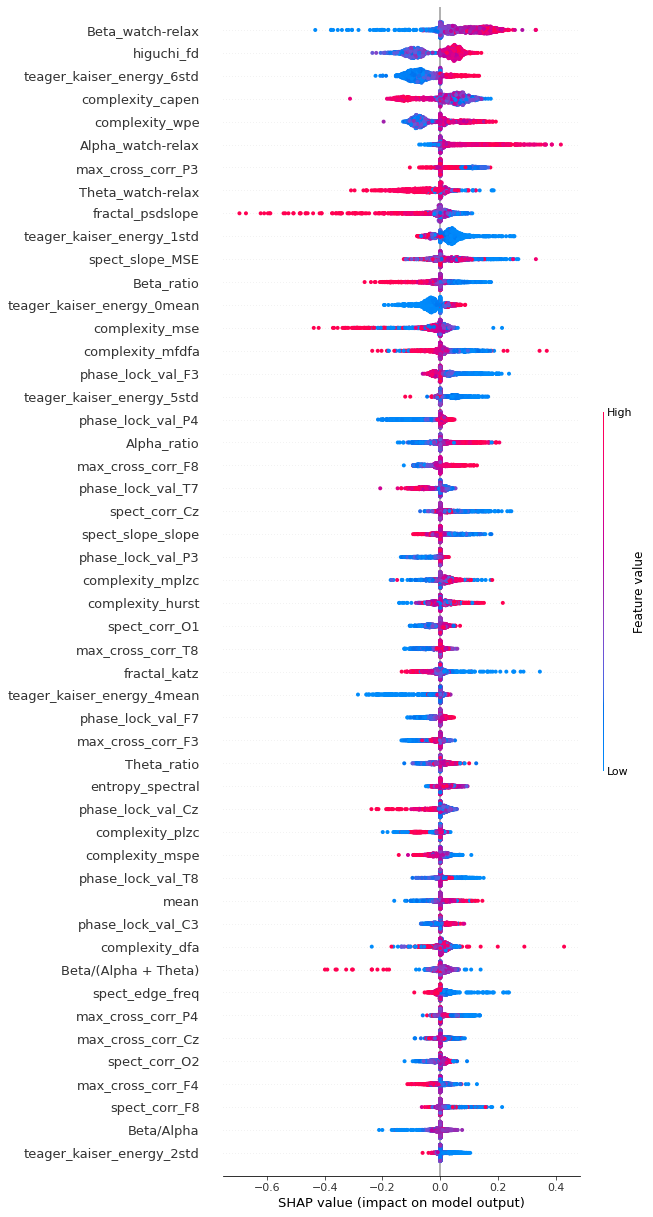

In [21]:
shap.summary_plot(shap_values, X_test, max_display=50, show=False)
plt.savefig('shap50Catboost.png',  bbox_inches='tight')

In [22]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.to_excel('CatboostRegressor_feature_importance.xlsx')

In [23]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.06520000100135803,
 'score_function': 'Cosine',
 'task_type'

In [95]:
y_pred = model.predict(X_test)

In [96]:
preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))

In [97]:
preds

array([[4.87      ],
       [5.04      ],
       [4.815325  ],
       ...,
       [5.04      ],
       [6.29      ],
       [2.80845031]])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

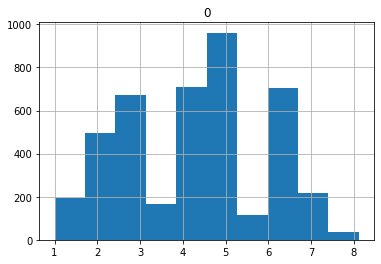

In [99]:
pd.DataFrame(preds).hist()

In [90]:
print(r2_score(y_test_inv, preds))
print(mean_absolute_percentage_error(y_test_inv, preds))
print(mean_absolute_error(y_test_inv, preds))

-2.098946045580637
1.7792959615620385
3.709145599250937


In [33]:
from sklearn.model_selection import GroupKFold

In [ ]:
test_pool = Pool(X_test, y_test, cat_features=['insert catfeatures'])

In [27]:
mae = model.eval_metrics(test_pool, ['MAE'])['MAE'][-1]
mape = model.eval_metrics(test_pool, ['MAPE'])['MAPE'][-1]
R2 = model.eval_metrics(test_pool, ['R2'])['R2'][-1]

print('MAE {}, MAPE {} R2 {}'.format(mae, mape, R2))

MAE 1.1396893066371783, MAPE 0.654673212755391 R2 -0.01885095835919115
